<a href="https://colab.research.google.com/github/CS20M038/CS6910-assignment_3/blob/main/Assignment3_version2_withencoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@title Import Libraries
from random import randint
from numpy import array
from numpy import argmax
import keras.backend as K
from tensorflow.keras import models
from numpy import array_equal
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Input
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Lambda
from tensorflow.keras import backend as K

from scipy.ndimage.interpolation import shift
import csv
import random
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [3]:
#@title Check GPU
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
else:
  print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
input_characters =[' ']
target_characters = [' ']

In [5]:
input_dict=['-PAD-']
target_dict=['-PAD-']
eng_alphabets = 'abcdefghijklmnopqrstuvwxyz'
pad_char = '-PAD-'

eng_alpha2index = {pad_char: 0}
for index, alpha in enumerate(eng_alphabets):
    eng_alpha2index[alpha] = index+1
    input_dict.append(alpha)

print(eng_alpha2index)
print(input_dict)
# Hindi Unicode Hex Range is 2304:2432. Source: https://en.wikipedia.org/wiki/Devanagari_(Unicode_block)

hindi_alphabets = [chr(alpha) for alpha in range(2304, 2432)]
hindi_alphabet_size = len(hindi_alphabets)

hindi_alpha2index = {pad_char: 0}
for index, alpha in enumerate(hindi_alphabets):
    hindi_alpha2index[alpha] = index+1
    target_dict.append(alpha)
    #print(alpha)

print(hindi_alpha2index)
print(target_dict)


# Hindi Unicode Hex Range is 2304:2432. Source: https://en.wikipedia.org/wiki/Devanagari_(Unicode_block)

hindi_alphabets = [chr(alpha) for alpha in range(2304, 2432)]
hindi_alphabet_size = len(hindi_alphabets)

hindi_index2alpha = {0: pad_char}
for index, alpha in enumerate(hindi_alphabets):
    hindi_index2alpha[index+1] = alpha
   # target_dict.append(alpha)
    #print(alpha)

print(hindi_index2alpha)

eng_alphabets = 'abcdefghijklmnopqrstuvwxyz'
eng_index2alpha = {0: pad_char}
for index, alpha in enumerate(eng_alphabets):
    eng_index2alpha[index+1] = alpha
   # target_dict.append(alpha)
    #print(alpha)

print(eng_index2alpha)

{'-PAD-': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}
['-PAD-', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
{'-PAD-': 0, 'ऀ': 1, 'ँ': 2, 'ं': 3, 'ः': 4, 'ऄ': 5, 'अ': 6, 'आ': 7, 'इ': 8, 'ई': 9, 'उ': 10, 'ऊ': 11, 'ऋ': 12, 'ऌ': 13, 'ऍ': 14, 'ऎ': 15, 'ए': 16, 'ऐ': 17, 'ऑ': 18, 'ऒ': 19, 'ओ': 20, 'औ': 21, 'क': 22, 'ख': 23, 'ग': 24, 'घ': 25, 'ङ': 26, 'च': 27, 'छ': 28, 'ज': 29, 'झ': 30, 'ञ': 31, 'ट': 32, 'ठ': 33, 'ड': 34, 'ढ': 35, 'ण': 36, 'त': 37, 'थ': 38, 'द': 39, 'ध': 40, 'न': 41, 'ऩ': 42, 'प': 43, 'फ': 44, 'ब': 45, 'भ': 46, 'म': 47, 'य': 48, 'र': 49, 'ऱ': 50, 'ल': 51, 'ळ': 52, 'ऴ': 53, 'व': 54, 'श': 55, 'ष': 56, 'स': 57, 'ह': 58, 'ऺ': 59, 'ऻ': 60, '़': 61, 'ऽ': 62, 'ा': 63, 'ि': 64, 'ी': 65, 'ु': 66, 'ू': 67, 'ृ': 68, 'ॄ': 6

In [6]:
def printTargetWord(seq):
    word = ""
    for chr in seq:
        #print(chr)
        if chr == 0:
            break
        word=word+hindi_index2alpha[int(chr)]
    return word
def printInputWord(seq):
    word = ""
    for chr in seq:
        if chr==0:
            break
        word=word+eng_index2alpha[int(chr)]
    return word

In [7]:
printInputWord([1, 14, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

'ank'

In [8]:
def readXmlDataset(filename):
        tsv_file = open(filename)
        read_tsv = csv.reader(tsv_file, delimiter="\t")
        lang1_words = []
        lang2_words = []

        for row in read_tsv:
            lang2_words.append(row[0])
            lang1_words.append(row[1])
            #print(row[0])

        return lang1_words, lang2_words
train_input_texts, train_target_texts = readXmlDataset('hi.translit.sampled.train.tsv')
test_input_texts, test_target_texts = readXmlDataset('hi.translit.sampled.test.tsv')

#Embedding the input texts

In [9]:
max_length=25
def gt_integer_code(word, letter2index, device = 'cpu'):
    gt_rep = []
    #print(gt_rep)
    for letter_index, letter in enumerate(word):
        pos = letter2index[letter]
        gt_rep.append(pos)
    length = len(gt_rep)
    pad = [0]*(max_length-length)
    gt_rep = gt_rep+pad
   # gt_rep.append(letter2index[pad_char])
    return gt_rep
#print(word_rep('abc',eng_alpha2index))
gt_integer_code('abc',eng_alpha2index)

[1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [10]:
def doc_integer_code(doc,letter2index):
    doc_integer_coded=[]
    for i, data in enumerate(doc):
        doc_integer_coded.append(gt_integer_code(data,letter2index))
    return doc_integer_coded
print((doc_integer_code(train_input_texts[0:3],eng_alpha2index)[2]))
train_input_texts[2]

[21, 14, 3, 12, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'uncle'

In [11]:
def gt_integer_code2(word, letter2index, device = 'cpu'):
    gt_rep = []
    #print(gt_rep)
    for letter_index, letter in enumerate(word):
        pos = letter2index[letter]
        gt_rep.append(pos)
    #length = len(gt_rep)
    #pad = [0]*(max_length-length)
    #gt_rep = gt_rep+pad
    gt_rep.append(letter2index[pad_char])
    return gt_rep
#print(word_rep('abc',eng_alpha2index))
(gt_integer_code2('abc',eng_alpha2index))

[1, 2, 3, 0]

In [12]:
def doc_integer_code2(doc,letter2index):
    doc_integer_coded=[]
    for i, data in enumerate(doc):
        doc_integer_coded.append(gt_integer_code2(data,letter2index))
    return doc_integer_coded
print((doc_integer_code2(train_input_texts[0:3],eng_alpha2index)[2]))
train_input_texts[2]
doc_integer_code2(train_input_texts,eng_alpha2index)[2]

[21, 14, 3, 12, 5, 0]


[21, 14, 3, 12, 5, 0]

In [13]:
def get_embedding2(dataset,letter2index):
    encoded_docs=doc_integer_code2(dataset,letter2index)
    padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
    padded_docs =encoded_docs
    return model_embed.predict(padded_docs)

In [14]:
#encoded_docs=doc_integer_code(train_input_texts,eng_alpha2index)
max_length = 25
vocab_size = 50
#padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
# define the model
model_embed = Sequential()
model_embed.add(Embedding(vocab_size, 27, input_length=max_length))
model_embed.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model_embed.summary())
def get_embedding(dataset,letter2index):
    encoded_docs=doc_integer_code(dataset,letter2index)
    #padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
    padded_docs =encoded_docs
    return model_embed.predict(padded_docs)


#X_train_padded = model_embed.predict(padded_docs)
#print(X_train_padded.shape)
#print(type(X_train_padded))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 27)            1350      
Total params: 1,350
Trainable params: 1,350
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
X_train_padded = get_embedding(train_input_texts,eng_alpha2index)
print(X_train_padded.shape)
print(type(X_train_padded))
X_test_padded = get_embedding(test_input_texts,eng_alpha2index)
print(X_test_padded.shape)
print(type(X_test_padded))

(44204, 25, 27)
<class 'numpy.ndarray'>
(4502, 25, 27)
<class 'numpy.ndarray'>


In [16]:
X_test_padded[0]

array([[-0.01684539, -0.00093144, -0.04498884, -0.04306152,  0.02897603,
        -0.03122258, -0.02423501,  0.03054381, -0.03044633,  0.01676998,
         0.04350395, -0.01103575, -0.03694405,  0.03062954, -0.03943662,
         0.0298497 ,  0.04982454,  0.01783581,  0.01092928,  0.03546324,
         0.02698047,  0.02002725,  0.01653074, -0.01364923,  0.04226304,
        -0.01117956,  0.02142515],
       [ 0.01880706,  0.03529947, -0.00088391,  0.01730463,  0.04263068,
         0.00407629,  0.01282469, -0.01745466,  0.03131231, -0.01111545,
        -0.0347657 , -0.01415227, -0.03063948,  0.04215157,  0.0073138 ,
        -0.02608013, -0.04337315,  0.01175234, -0.01635293, -0.02176874,
         0.04273966,  0.00959348, -0.03308815, -0.04395678,  0.00965023,
        -0.02025654, -0.01939796],
       [-0.04646669, -0.00328764, -0.00467537,  0.03524372,  0.0002665 ,
        -0.0218753 , -0.00284155, -0.02671268, -0.02458905,  0.04952306,
         0.00598993,  0.03029763,  0.01954191, -0.0296

In [17]:
len(X_test_padded)

4502

In [18]:
X_test=[]
lengthV=doc_integer_code2(test_input_texts,eng_alpha2index)
for i in range(len(X_test_padded)):
 # print(i)
  X_test.append(X_test_padded[i][0:len(lengthV[i]),])
X_test= np.array(X_test)

X_train=[]
lengthV=doc_integer_code2(train_input_texts,eng_alpha2index)
for i in range(len(X_train_padded)):
  #print(i)
  X_train.append(X_train_padded[i][0:len(lengthV[i]),])
X_train= np.array(X_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  del sys.path[0]


In [19]:
X_test[0].shape

(4, 27)

#Encoding target texts

In [20]:
def word_rep(word, letter2index, device = 'cpu'):
    rep = np.zeros((len(word)+1,  129))
    for letter_index, letter in enumerate(word):
        pos = letter2index[letter]
        rep[letter_index][pos] = 1
    pad_pos = letter2index[pad_char]
    rep[letter_index+1][pad_pos] = 1
    return rep

def gt_rep(word, letter2index, device = 'cpu'):
    gt_rep = np.zeros([len(word)+1, 1], dtype=np.long)
    for letter_index, letter in enumerate(word):
        pos = letter2index[letter]
        gt_rep[letter_index][0] = pos
    gt_rep[letter_index+1][0] = letter2index[pad_char]
    return gt_rep
    word_rep('abc',eng_alpha2index).shape
    x=gt_rep('abc',eng_alpha2index)

In [21]:
def createDataset(dataset,letter2index):
    X_train=[]
    for i,data in enumerate(dataset):
        #print(data)
        X_train.append(word_rep(data,letter2index))
    X_train = np.array(X_train)
    return X_train

In [22]:
X_train_orig = createDataset(train_input_texts,eng_alpha2index)
y_train = createDataset(train_target_texts,hindi_alpha2index)
X_test_orig = createDataset(test_input_texts,eng_alpha2index)
y_test = createDataset(test_target_texts,hindi_alpha2index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [23]:
print(len(eng_alpha2index))
#a=[0]*(len(eng_alpha2index)-1)
a=[0]*128
eng_pad=[1]
eng_pad=eng_pad+a
print(eng_pad)
print(len(hindi_alpha2index))
a=[0]*128
hindi_pad=[1]
hindi_pad=hindi_pad+a
print(hindi_pad)

27
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
129
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [24]:
def one_hot_encode(sequence, n_unique):
	encoding = list()
	for value in sequence:
		vector = [0 for _ in range(n_unique)]
		vector[value] = 1
		encoding.append(vector)
	return array(encoding)

In [25]:
one_hot_encode([1,2,3],10)

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [26]:
def one_hot_decode(encoded_seq):
	return [argmax(vector) for vector in encoded_seq]
'''d=one_hot_decode(y_train_padded[5])
c=hindi_index2alpha[6]+hindi_index2alpha[3]+hindi_index2alpha[22]+hindi_index2alpha[66]+hindi_index2alpha[49]+hindi_index2alpha[64]+hindi_index2alpha[37]+hindi_index2alpha[0]
c'''

'd=one_hot_decode(y_train_padded[5])\nc=hindi_index2alpha[6]+hindi_index2alpha[3]+hindi_index2alpha[22]+hindi_index2alpha[66]+hindi_index2alpha[49]+hindi_index2alpha[64]+hindi_index2alpha[37]+hindi_index2alpha[0]\nc'

In [27]:
max_input_sequence= 25
#max(len(seq) for seq in X_train)
max_output_sequence= 25
#max(len(seq) for seq in y_train)

print('max_input_sequence: ', max_input_sequence)
print('max_output_sequence: ', max_output_sequence)

max_input_sequence:  25
max_output_sequence:  25


In [28]:
from keras.preprocessing.sequence import pad_sequences
#X_train_padded = pad_sequences(X_train, maxlen= max_input_sequence, padding='post', value=eng_pad)
y_train_padded = pad_sequences(y_train, maxlen= max_output_sequence, padding='post', value=hindi_pad)
#print("X_train shape: ",X_train.shape)
print("X_train_padded shape: ",X_train_padded.shape)
print("y_train shape: ",y_train.shape)
print("y_train_padded shape: ",y_train_padded.shape)
print(type(X_train_padded))
#print("X_test shape: ",X_test.shape)
#print("X_test_padded shape: ",X_test_padded.shape)
#print("y_test shape: ",y_test.shape)
#print("y_test_padded shape: ",y_test_padded.shape)
#print(type(X_test_padded))

X_train_padded shape:  (44204, 25, 27)
y_train shape:  (44204,)
y_train_padded shape:  (44204, 25, 129)
<class 'numpy.ndarray'>


In [29]:
#X_test_padded = pad_sequences(X_test, maxlen= max_input_sequence, padding='post', value=eng_pad)

y_test_padded = pad_sequences(y_test, maxlen= max_output_sequence, padding='post', 
                              value=hindi_pad)
#print("X_test shape: ",X_test.shape)
print("X_test_padded shape: ",X_test_padded.shape)
print("y_test shape: ",y_test.shape)
print("y_test_padded shape: ",y_test_padded.shape)

X_test_padded shape:  (4502, 25, 27)
y_test shape:  (4502,)
y_test_padded shape:  (4502, 25, 129)


#print sample sequence

In [30]:
i=0
print("____Sample Input (Raw Format)____")
print("Original:\n", doc_integer_code2(train_input_texts,eng_alpha2index)[i])
print("Padded:\n",doc_integer_code(train_input_texts,eng_alpha2index)[i])
print("____Corresponding Output (Raw Format)____")
print("Original:\n", one_hot_decode(y_train[i]))
print("Padded:\n",one_hot_decode(y_train_padded[i]))

____Sample Input (Raw Format)____
Original:
 [1, 14, 0]
Padded:
 [1, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
____Corresponding Output (Raw Format)____
Original:
 [6, 3, 0]
Padded:
 [6, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [31]:
#Prepare TRAIN data set
input_dimension = 27  
output_dimension = 129
encoder_input_data = X_train_padded.copy()
decoder_target_data = y_train_padded.copy()
decoder_input_data = decoder_target_data.copy()
for i, samples in enumerate(decoder_target_data):
  seq = one_hot_decode(samples)
  shifted= shift(seq, 1, cval=0)
  decoder_input_data[i]=one_hot_encode(shifted,output_dimension)
print("Data for Train")
'''print('encoder_input_data (X): ', one_hot_decode(encoder_input_data[1]))
print('decoder_input_data (teacher forcing): ',one_hot_decode(decoder_input_data[1]))
print('decoder_target_data (y):',one_hot_decode(decoder_target_data[1]))'''
print("encoder_input_shape",encoder_input_data.shape)
print("decoder_input_shape",decoder_input_data.shape)

#Prepare TEST data set
encoder_input_test = X_test_padded.copy()
decoder_target_test = y_test_padded.copy()
decoder_input_test= decoder_target_test.copy()
for i, samples in enumerate(decoder_target_test):
  seq = one_hot_decode(samples)
  shifted= shift(seq, 1, cval=0)
  decoder_input_test[i]=one_hot_encode(shifted,output_dimension)

Data for Train
encoder_input_shape (44204, 25, 27)
decoder_input_shape (44204, 25, 129)


In [32]:
#title LSTMoutputDimension
LSTMoutputDimension = 256

In [33]:
# Define an input sequence and process it.
encoder_inputs= Input(shape=(max_input_sequence, input_dimension), name='encoder_inputs')

masking = tf.keras.layers.Masking(mask_value= [1]+[0]*(input_dimension-1))
encoder_inputs_masked = masking(encoder_inputs)

#encoder_inputs_masked=encoder_inputs
encoder_lstm=LSTM(LSTMoutputDimension, return_state=True, name='encoder_lstm')
LSTM_outputs, state_h, state_c = encoder_lstm(encoder_inputs_masked)


# We discard `LSTM_outputs` and only keep the other states.
encoder_states = [state_h, state_c]



decoder_inputs = Input(shape=(None, output_dimension), name='decoder_inputs')
decoder_lstm = LSTM(LSTMoutputDimension, return_sequences=True, return_state=True, name='decoder_lstm')

# Set up the decoder, using `context vector` as initial state.
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)

#complete the decoder model by adding a Dense layer with Softmax activation function 
#for prediction of the next output
#Dense layer will output one-hot encoded representation as we did for input
#Therefore, we will use input_dimension number of neurons
decoder_dense = Dense(output_dimension, activation='softmax', name='decoder_dense')
decoder_outputs = decoder_dense(decoder_outputs)

# put together
model_encoder_training = Model([encoder_inputs, decoder_inputs], decoder_outputs, name='model_encoder_training')

Model: "model_encoder_training"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_inputs (InputLayer)     [(None, 25, 27)]     0                                            
__________________________________________________________________________________________________
masking (Masking)               (None, 25, 27)       0           encoder_inputs[0][0]             
__________________________________________________________________________________________________
decoder_inputs (InputLayer)     [(None, None, 129)]  0                                            
__________________________________________________________________________________________________
encoder_lstm (LSTM)             [(None, 256), (None, 290816      masking[0][0]                    
_____________________________________________________________________________

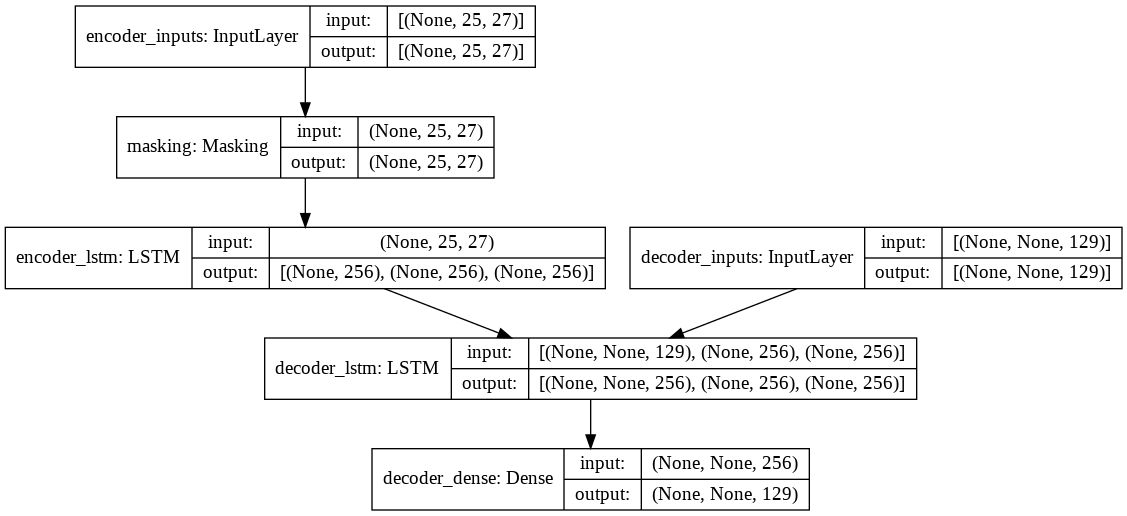

In [34]:
model_encoder_training.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_encoder_training.summary()
plot_model(model_encoder_training, show_shapes=True)

In [ ]:
model_encoder_training.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=64,
          epochs=100,
          validation_split=0.2)

Epoch 1/100
553/553 [==============================] - 44s 16ms/step - loss: 1.2356 - accuracy: 0.7555 - val_loss: 0.9976 - val_accuracy: 0.7622
Epoch 2/100
553/553 [==============================] - 7s 13ms/step - loss: 0.8032 - accuracy: 0.7839 - val_loss: 1.0016 - val_accuracy: 0.7709
Epoch 3/100
553/553 [==============================] - 7s 13ms/step - loss: 0.7698 - accuracy: 0.7886 - val_loss: 0.9622 - val_accuracy: 0.7771
Epoch 4/100
553/553 [==============================] - 7s 13ms/step - loss: 0.7141 - accuracy: 0.8005 - val_loss: 0.9267 - val_accuracy: 0.7888
Epoch 5/100
553/553 [==============================] - 7s 12ms/step - loss: 0.6556 - accuracy: 0.8139 - val_loss: 0.9275 - val_accuracy: 0.7959
Epoch 6/100
553/553 [==============================] - 7s 12ms/step - loss: 0.5949 - accuracy: 0.8300 - val_loss: 0.9161 - val_accuracy: 0.8005
Epoch 7/100
553/553 [==============================] - 7s 13ms/step - loss: 0.5187 - accuracy: 0.8499 - val_loss: 0.9370 - val_accuracy

In [ ]:
#title Function to Train & Test  given model (Early Stopping monitor 'val_loss')
def train_test(model, X_train, y_train , X_test, 	y_test, epochs=500, batch_size=32, patience=5,verbose=0):
	# patient early stopping
	#es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=1, patience=20)
	es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=patience)
	# train model
	print('training for ',epochs,' epochs begins with EarlyStopping(monitor= val_loss, patience=',patience,')....')
	history=model.fit(X_train, y_train, validation_split= 0.1, epochs=epochs,batch_size=batch_size, verbose=verbose, callbacks=[es])
	print(epochs,' epoch training finished...')

	# report training
	# list all data in history
	#print(history.history.keys())
	# evaluate the model
	_, train_acc = model.evaluate(X_train, y_train, batch_size=batch_size, verbose=0)
	_, test_acc = model.evaluate(X_test, 	y_test, batch_size=batch_size, verbose=0)
	print('\nPREDICTION ACCURACY (%):')
	print('Train: %.3f, Test: %.3f' % (train_acc*100, test_acc*100))
	# summarize history for accuracy
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title(model.name+' accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()
	# summarize history for loss
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title(model.name+' loss')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()




  
	# spot check some examples
	space = 3*len(one_hot_decode(y_test[0]))
	print('10 examples from test data...')
	print('Input',' '*(space-4) ,'Expected',' '*(space-7) ,
	      'Predicted',' '*(space-5) ,'T/F')
	correct =0 
	sampleNo =  100
  #model = model_encoder_training

	predicted= model.predict(X_test[:sampleNo], batch_size=batch_size)
	for sample in range(0,sampleNo):
		if (one_hot_decode(y_test[sample])== one_hot_decode(predicted[sample])):
			correct+=1
		print(test_input_texts[sample], ' ', 
					printTargetWord(one_hot_decode(y_test[sample])),' ', printTargetWord(one_hot_decode(predicted[sample])),
					' ',one_hot_decode(y_test[sample])== one_hot_decode(predicted[sample]))
	print('Accuracy: ', correct/sampleNo)

In [ ]:
model = model_encoder_training
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]
X_test[:1].shape

In [ ]:
train_test(model_encoder_training, [encoder_input_data, decoder_input_data], decoder_target_data ,
           [encoder_input_test, decoder_input_test], 
           decoder_target_test, epochs=50, batch_size=64, patience=3,verbose=2)


In [ ]:
encoder_model = Model(encoder_inputs, encoder_states)

In [ ]:
decoder_state_input_h = Input(shape=(LSTMoutputDimension,))
decoder_state_input_c = Input(shape=(LSTMoutputDimension,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, output_dimension))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, 0] = 1 
    # START (0 zero) in one-hot-encoding --> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_seq = list()
    while not stop_condition:

        # in a loop
        # decode the input to a token/output prediction + required states for context vector
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        # convert the token/output prediction to a token/output
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = sampled_token_index
        # add the predicted token/output to output sequence
        decoded_seq.append(sampled_char)
        

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == 0 or
           len(decoded_seq) == max_output_sequence):
            stop_condition = True

        # Update the input target sequence (of length 1) 
        # with the predicted token/output 
        target_seq = np.zeros((1, 1, output_dimension))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update input states (context vector) 
        # with the ouputed states
        states_value = [h, c]

        # loop back.....
        
    # when loop exists return the output sequence
    return decoded_seq

In [ ]:
 y=one_hot_decode(decoder_target_data[2])
 len(y)
train_input_texts[2]

In [ ]:
predicted=decode_sequence(encoder_input_data[2].reshape(1,max_input_sequence,input_dimension))
x=predicted+ [0] * (max_output_sequence- len(predicted))
len(x)
x==y

In [ ]:
print('Input \t\t\t\t\t  Expected  \t\t\t   Predicted \t\t\t\t\t\t\t T/F')
correct =0 
sampleNo =  100
for sample in range(0,sampleNo):
  predicted= decode_sequence(encoder_input_data[sample].reshape(1,max_input_sequence,input_dimension))
  if (one_hot_decode(decoder_target_data[sample])== predicted+ [0] * (max_output_sequence- len(predicted))):
    correct+=1
  print( train_input_texts[sample], '\t\t', 
        printTargetWord( one_hot_decode(decoder_target_data[sample])),'\t', printTargetWord(predicted),
        '\t\t', one_hot_decode(decoder_target_data[sample])== predicted+ [0] * (max_output_sequence- len(predicted)))
print('Accuracy: ', correct/sampleNo)

#Test custom words

In [ ]:
test_word_set = ['upnivesh','gulabon','radha','krishna','sita','ram']
X_test_word_padded = get_embedding(test_word_set,eng_alpha2index)
'''X_test_word=createDataset(test_word_set,eng_alpha2index)
X_test_word_padded=pad_sequences(X_test_word, maxlen= max_input_sequence, padding='post', value=eng_pad)
print("X_test_word shape: ",X_test_word.shape)
print("X_test_word_padded shape: ",X_test_word_padded.shape)'''
encoder_test_word_input_data = X_test_word_padded.copy()
correct =0 
sampleNo= len(test_word_set)
for i in range(sampleNo):
    decode_seq= decode_sequence(encoder_test_word_input_data[i].reshape(1,max_input_sequence,input_dimension))
    print(test_word_set[i],end=" ")
    print(printTargetWord(decode_seq[:-1]))
#print('Accuracy: ', correct/sampleNo)


In [ ]:
randomlist = []
for i in range(0,10):
    n = random.randint(100,1000)
    randomlist.append(n)
print(randomlist)
for seq_index in randomlist:
    # Take one sequence (part of the training set)
    # for trying out decoding.
    input_seq = encoder_input_test[seq_index : seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print("-")
    #print("Input sentence:", input_texts[seq_index])
    print("Input sentence:", test_input_texts[seq_index])
    print("Decoded sentence:", printTargetWord(decoded_sentence))